## Banknote Classification
### Loading the required packages

In [9]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import urllib.request
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


### Loading data from website into workbook

In [2]:
data_url = "https://www.openml.org/data/get_csv/1586223/php50jXam"
urllib.request.urlretrieve(data_url, "banknote_data.csv")
df=pd.read_csv('banknote_data.csv')
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


### Summary of data

In [53]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.555394
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Plotting the data

<IPython.core.display.Javascript object>


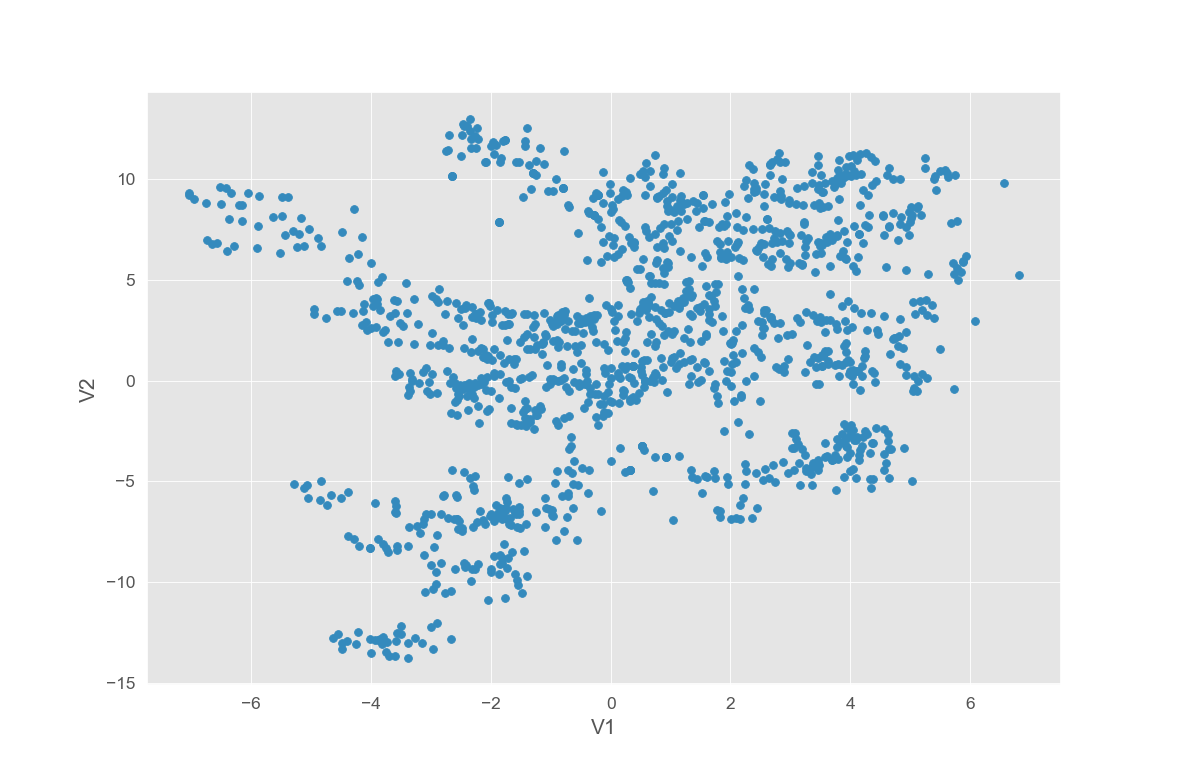

In [54]:
%matplotlib notebook
plt.style.use('ggplot')

df.plot('V1','V2',kind='scatter')

### Standarising the data for analysis

#### We're going to use only first two columns for further analysis

In [55]:
col_1 = df["V1"]
col_2 = df["V2"]
st_dev_col_1 = np.std(df['V1'])
st_dev_col_2 = np.std(df['V2'])
mean_col_1 = np.mean(df["V1"])
mean_col_2 = np.mean(df["V2"])
col_1_stand = (col_1 - mean_col_1)/st_dev_col_1
col_2_stand = (col_2 - mean_col_2)/st_dev_col_2
data = {'V1':col_1_stand,
        'V2':col_2_stand}
df_stand = pd.DataFrame(data)
df_stand.describe()

,V1,V2
count,1.372000e+03,1.372000e+03
mean,-1.186288e-16,-1.180623e-16
std,1.000365e+00,1.000365e+00
min,-2.630737e+00,-2.675252e+00
25%,-7.765474e-01,-6.188189e-01
50%,2.197423e-02,6.771828e-02
75%,8.402427e-01,8.338757e-01
max,2.249008e+00,1.879908e+00


### Creating numpy column stack

In [56]:
data_stand = np.column_stack((df_stand["V1"],df_stand["V2"]))
data_origin = np.column_stack((df["V1"],df["V2"]))
data_stand[:5]

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       [ 1.06374236,  1.29547754],
       [-0.03677175, -1.0870383 ]])

### Applying K-means clustering on the standarised data as well as on the original data

In [57]:
kmeans_stand = KMeans(n_clusters = 2,random_state = 10,n_init = 40,).fit(data_stand)
kmeans_origin = KMeans(n_clusters = 2,random_state = 10,n_init = 40).fit(data_origin)
clusters_stand = kmeans_stand.predict(data_stand)
cluster_centers_stand = kmeans_stand.cluster_centers_
clusters_origin = kmeans_origin.predict(data_origin)
cluster_centers_origin = kmeans_origin.cluster_centers_

### Plotting the clusters

<IPython.core.display.Javascript object>


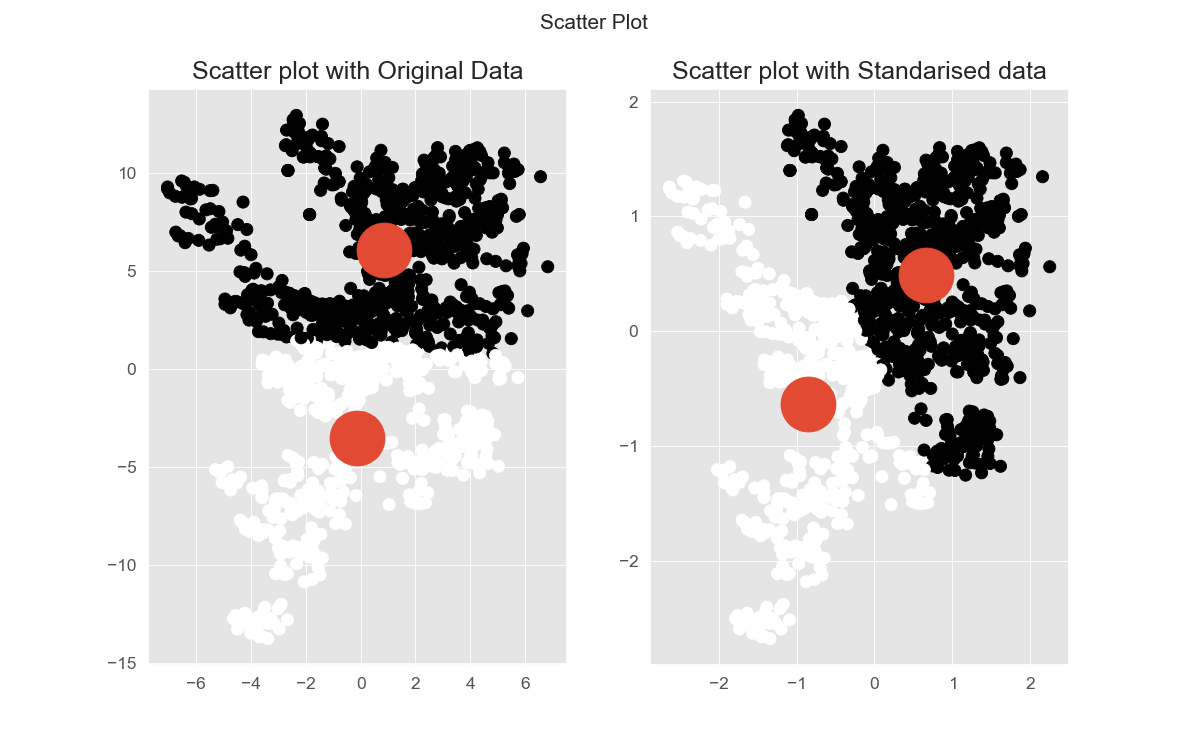

Text(0.5, 0.98, 'Scatter Plot')

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax2.scatter(df_stand["V1"],df_stand["V2"],c=clusters_stand)
ax2.scatter(cluster_centers_stand[:,0],cluster_centers_stand[:,1],s=1000)
ax2.set_title("Scatter plot with Standarised data")
ax1.scatter(df["V1"],df["V2"],c=clusters_origin)
ax1.scatter(cluster_centers_origin[:,0],cluster_centers_origin[:,1],s=1000)
ax1.set_title("Scatter plot with Original Data")
fig.suptitle("Scatter Plot")


### Analysing the result of K-means clustering

In [59]:
df['Class'] = df['Class'].replace(2,0)
print("Accuracy Score of the Algorithm with Standarised Data is",accuracy_score(df['Class'],clusters_stand),
      "with an F1 score of",f1_score(df['Class'],clusters_stand))
print("Accuracy Score of the Algorithm with Original Data is",accuracy_score(df['Class'],clusters_origin),
      "with an F1 score of",f1_score(df['Class'],clusters_origin))

Accuracy Score of the Algorithm with Standarised Data is 0.8782798833819242 with an F1 score of 0.8913467794404685
Accuracy Score of the Algorithm with Original Data is 0.6508746355685131 with an F1 score of 0.6899676375404531
